## Approximating a Solution to the 1D Heat Equation for Different Constants 'c' > 0

Consider the 1D heat equation

\begin{equation}
  u_t = c u_{xx} \quad \textrm{ for } x \in \left( 0, 1 \right), t \in \left( 0, T \right), \text{ such that } c>0
\end{equation}

subject to an initial condition

\begin{equation}
  u \left( x, t = 0 \right) = \sin \left( 2 \pi x \right) + 2 \sin \left( 5 \pi x \right),
\end{equation}

and homogeneous Dirichlet boundary conditions

\begin{equation}
  u \left( x = 0, t \right) = u \left( x = 1, t \right) = 0.
\end{equation}

such that the analytical solution is 

\begin{equation}
u \left( x, t \right) = e^{-4 \pi^2 c t} \sin \left( 2 \pi x \right) + 2 e^{-25 \pi^2 c t}\sin \left( 5 \pi x \right).
\end{equation}

number of grid points = 101
number of grid points = 100


C:\Users\alann\AppData\Local\Temp\ipykernel_47504\965859346.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  N = np.int(np.floor(T/dt))


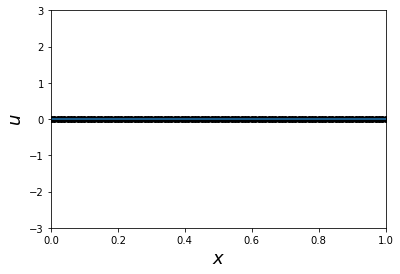

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation

# Value for c
c = 7

# The grid spacing in the x-dimension
dx = 0.01
# The x-dimension grid locations and check
x = np.arange(0, 1 + dx, dx)
print(f'number of grid points = {len(x)}')
# The number of x-dimension grid divisions
M = np.size(x)-1
# The time step size
dt = 0.001
# The time integration length
T = 0.1
# The number of timesteps and check
N = np.int(np.floor(T/dt))
print(f'number of grid points = {N}')

# Define the numerical solution 
# the first index is space and the second time
U = np.zeros((M+1,N+1))
U_exact = np.zeros((M+1,N+1))


# The initial condition
U[:,0] = np.sin(2*np.pi*x) + 2*np.sin(5*np.pi*x)
U_exact[:,0] = np.sin(2*np.pi*x) + 2*np.sin(5*np.pi*x);
# enforcing the boundary condition
U[0,0] = 0 
U[-1,0] = 0

# matrices which apply the Crank-Nicolson method
mu = c*dt/dx**2 
A_1 = np.diagflat((1+mu)*np.ones(M-1))+np.diagflat((-mu/2)*np.ones(M-2),1)+np.diagflat((-mu/2)*np.ones(M-2),-1)
A_1_inv = np.linalg.inv(A_1)
A_2 = np.diagflat((1-mu)*np.ones(M-1))+np.diagflat((mu/2)*np.ones(M-2),1)+np.diagflat((mu/2)*np.ones(M-2),-1)

for n in range(N):
    # enforcing the boundary condition
    U[0,n+1] = 0 
    U[-1,n+1] = 0 
    # A single Crank-Nicolson timestep
    U[1:M,n+1] = np.dot(A_1_inv,np.dot(A_2,U[1:M,n]))
    U_exact[:,n+1] = np.exp(-4*np.pi**2*c*(n+1)*dt)*np.sin(2*np.pi*x)+2*np.exp(-25*np.pi**2*c*(n+1)*dt)*np.sin(5*np.pi*x);

# Gather the data
data_ = U[:, :-1]  # Numerical solution data
data_exact = U_exact[:, 1:]  # Exact solution data


# Save the data to a .npy file
#np.save('file_path', data_)
#np.save('file_path', data_exact)

fig, ax = plt.subplots()
ax.set_xlabel(r'$x$', fontsize=18)  # Add an x-label to the axes.
ax.set_ylabel('$u$', fontsize=18)
ax.axis([0,1,-3,3])
l, = ax.plot([],[],'ok')
m, = ax.plot([],[])
def animate(i):
    l.set_data(x, U[:,i])
    m.set_data(x, U_exact[:,i])
    
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=N)

from IPython.display import HTML
HTML(ani.to_jshtml()) 

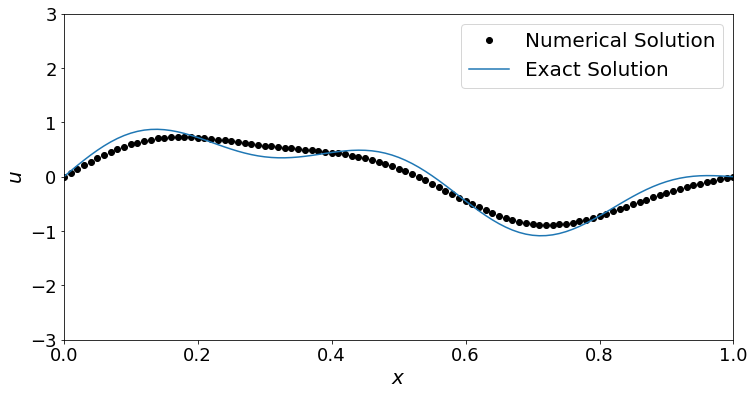

In [5]:
import numpy as np
import matplotlib.pyplot as plt
# Creating plots PER STEP

# let n = time step we wish to capture
n=1

# figure size
plt.figure(figsize=(12, 6))

# figure labels    
plt.xlabel(r'$x$',  fontsize= 20,fontweight='bold')
plt.ylabel(r'$u$',  fontsize= 20,fontweight='bold')
plt.axis([0,1,-3,3])

# plotting both solutions
plt.plot(x, U[:, n], 'ok', label='Numerical Solution')
plt.plot(x, U_exact[:, n], label='Exact Solution')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize = 20)
# save the figure
plt.savefig('FD_Heat1_0.0001.png')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


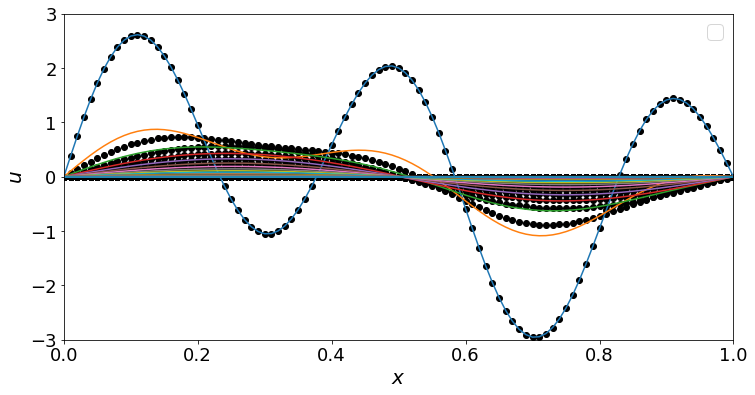

In [7]:
# plot for the COMPUTED and EXACT solution

# figure size
plt.figure(figsize=(12, 6))

# figure labels    
plt.xlabel(r'$x$',  fontsize= 20,fontweight='bold')
plt.ylabel(r'$u$',  fontsize= 20,fontweight='bold')
plt.axis([0,1,-3,3])

# plotting both solutions
plt.plot(x, U, 'ok')
plt.plot(x, U_exact)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize = 20)

# save the figure
plt.savefig('num_exact_heat.png')
plt.show()

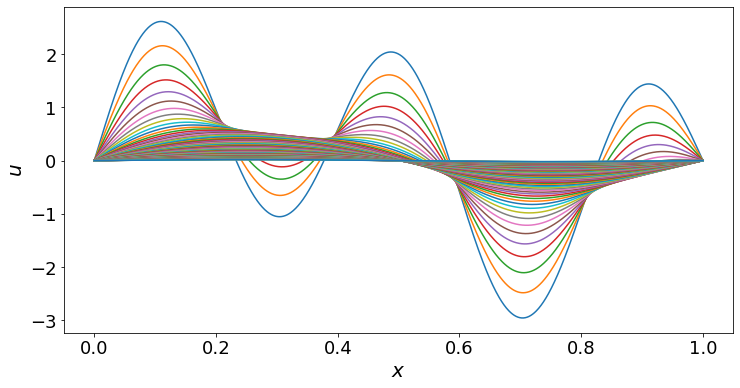

In [3]:
# plot for the EXACT solution
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(x, U_exact)
#plt.plot(x, U , label='Numerical Solution')
plt.xlabel(r'$x$', fontsize= 20,fontweight='bold')
plt.ylabel(r'$u$', fontsize= 20,fontweight='bold')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('EXACT_heat.png')
plt.show()
#plt.savefig('EXACT_heat.png')


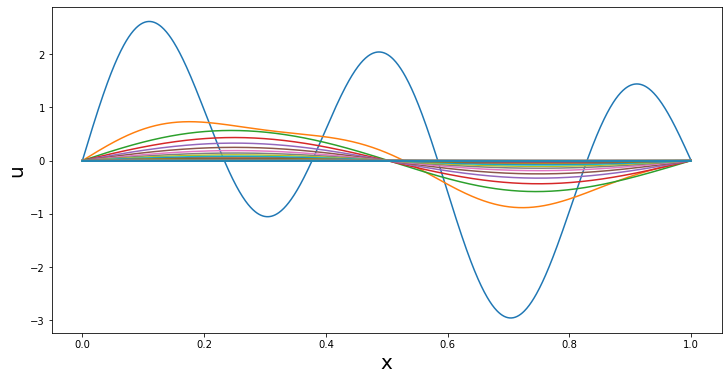

In [12]:
# plot for the COMPUTED solution

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
#plt.plot(x, U_exact)
plt.plot(x, U , label='Numerical Solution')
plt.xlabel('x', fontsize=20)
plt.ylabel('u', fontsize=20)
plt.savefig('FD_heat.png')
plt.show()

### Calculating the errors associated with the heat equation for different error metrics.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation


## ====== setting parameters =======
# The grid spacing in the x-dimension
dx_vec = np.array([0.04,0.02, 0.01,0.005,0.001])
max_norm2 = np.zeros_like(dx_vec);
max_norm2_dx = np.zeros_like(dx_vec);
fin_mse = np.zeros_like(dx_vec);
fin_mae = np.zeros_like(dx_vec);

for i, dx in enumerate(dx_vec):
    # The x-dimension grid locations
    x = np.arange(0, 1 + dx, dx)
    # The number of x-dimension grid divisions
    M = np.size(x)-1;
    # The time step size
    dt = 0.25*dx;
    # The time integration length
    T = 0.1;
    # The number of timesteps
    N = np.int(np.floor(T/dt))

    # Define the numerical solution 
    # the first index is space and the second time
    U = np.zeros((M+1,N+1))
    e_n = np.zeros((M+1))

    # The initial condition
    U[:,0] = np.sin(2*np.pi*x) + 2*np.sin(5*np.pi*x);
    Uexact = np.sin(2*np.pi*x) + 2*np.sin(5*np.pi*x);

    # enforcing the boundary condition
    U[0,0] = 0 
    U[-1,0] = 0 

    # Assemble matrix which applies the Crank-Nicolson method
    mu = dt/dx**2
    A_1 = np.diagflat((1+mu)*np.ones(M-1))+np.diagflat((-mu/2)*np.ones(M-2),1)+np.diagflat((-mu/2)*np.ones(M-2),-1)
    A_1_inv = np.linalg.inv(A_1)
    A_2 = np.diagflat((1-mu)*np.ones(M-1))+np.diagflat((mu/2)*np.ones(M-2),1)+np.diagflat((mu/2)*np.ones(M-2),-1)

    # define norm vectors
    norm2 = np.zeros(N+1)
    norm2_dx = np.zeros(N+1)
    MSE = np.zeros(N+1)
    MAE = np.zeros(N+1)

    for n in range(N):
        # enforcing the boundary condition
        U[0,n+1] = 0 
        U[-1,n+1] = 0 
        # A single Crank-Nicolson timestep
        U[1:M,n+1] = np.dot(A_1_inv,np.dot(A_2,U[1:M,n]))
        # exact solution 
        Uexact[:] = np.exp(-4*np.pi**2*(n+1)*dt)*np.sin(2*np.pi*x)+2*np.exp(-25*np.pi**2*(n+1)*dt)*np.sin(5*np.pi*x);
        #  calculate the error at each time step
        e_n[:] = U[:,n+1]-Uexact[:]
        MSE[n+1] = (1/N)*(np.sum(e_n)**2)
        MAE[n+1] = (np.sum(np.abs(e_n)))
        norm2[n+1] = np.sqrt(np.sum(e_n**2))
        norm2_dx[n+1] = np.sqrt(dx*np.sum(e_n**2)) 

    max_norm2[i] = np.max(norm2)
    max_norm2_dx[i] = np.max(norm2_dx)
    fin_mse[i] = np.max(MSE)
    fin_mae[i] = np.max(MAE)
print(f'MSE = {fin_mse}')
print(f'MAE = {fin_mae}')
print(f'max_norm2 = {max_norm2}')
print(f'max_norm2_dx = {max_norm2_dx}')

C:\Users\alann\AppData\Local\Temp\ipykernel_47652\2726110111.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  N = np.int(np.floor(T/dt))


MSE = [1.13501415e-01 2.02191563e-02 1.97449637e-03 2.44451522e-04
 1.93022753e-06]
MAE = [5.33325741 3.18052251 1.40540868 0.69926345 0.13893463]
max_norm2 = [1.22388195 0.50359469 0.15639758 0.05494476 0.00488   ]
max_norm2_dx = [2.44776391e-01 7.12190439e-02 1.56397584e-02 3.88518129e-03
 1.54319211e-04]
